In [18]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

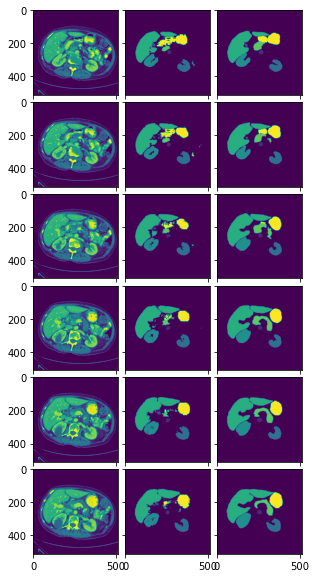

In [28]:
PRED_PATH = '../references/Swin-Unet/output/predictions/'

def display_slice(name, from_slice, to_slice):
    img = nib.load(PRED_PATH + name + '_img.nii').get_fdata()
    pred = nib.load(PRED_PATH + name + '_pred.nii').get_fdata()
    gt = nib.load(PRED_PATH + name + '_gt.nii').get_fdata()
    
    num_slices = to_slice - from_slice + 1
    fig = plt.figure(figsize=(6., 12.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_slices, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    
    for i in range(0, num_slices):
        img_slice = img[:,:,i + from_slice]
        pred_slice = pred[:,:,i + from_slice]
        gt_slice = gt[:,:,i + from_slice]
        
        # plt.subplot(3, 1, i + 1)
        img_ax = grid[i*3]
        pred_ax = grid[i*3 + 1]
        gt_ax = grid[i*3 + 2]
        img_ax.imshow(img_slice)
        
        # plt.subplot(3, 2, i + 1)
        pred_ax.imshow(pred_slice)
        
        # plt.subplot(3, 3, i + 1)
        gt_ax.imshow(gt_slice)
        plt.gcf().set_size_inches(10, 10)
    plt.show()
    
display_slice('case0001', 100, 105)